## Week 12 and 13 Assignment - DATASCI200 Introduction to Data Science Programming, UC Berkeley MIDS

Write code in this Jupyter Notebook to solve the following problems. Please upload this **Notebook** with your solutions to your GitHub repository and provide a link in the last question in gradescope. 

Assignment due date: 11:59PM PT the night before the Week 13 Live Session. Do **NOT** push/upload the data fil

## Objectives

- Explore and glean insights from a real dataset using pandas
- Practice using pandas for exploratory analysis, information gathering, and discovery
- Practice using matplotlib for data visualization

## General Guidelines:

- This is a **real** dataset and so it may contain errors and other pecularities to work through
- This dataset is ~218mb, which will take some time to load (and probably won't load in Google Sheets or Excel)
- If you make assumptions, annotate them in your responses
- While there is one code/markdown cell positioned after each question as a placeholder, some of your code/responses may require multiple cells
- Double-click the markdown cells that say for example **1a answer here:** to enter your written answers. If you need more cells for your written answers, make them markdown cells (rather than code cells)
- This homework assignment is not autograded because of the variety of responses one could give. 
  - Please upload this notebook to the autograder page and the TAs will manually grade it. 
  - Ensure that each cell is run and outputs your answer for ease of grading! 
  - Highly suggest to do a `restart & run all` before uploading your code to ensure everything runs and outputs correctly.
  - Answers without code (or code that runs) will be given 0 points.
- **This is meant to simulate real world data so you will have to do some external research to determine what some of the answers are!** 
- Only use the plotting libraries matplotlib or seaborn for the visualizations.

## Dataset

You are to analyze campaign contributions to the 2016 U.S. presidential primary races made in California. Use the csv file located here: https://drive.google.com/file/d/1ftdw7L9Z6WQJ6i0SXj030PA7ObsXfPsg/view?usp=sharing. You should download and save this file in a folder outside where this notebook is stored. This file originally came from the U.S. Federal Election Commission (https://www.fec.gov/).

This file is already cleaned and ready to use - you **do not** need to filter or clean it anymore! (you may not agree with the how it was cleaned but please use this file as is).

**DO NOT PUSH THIS FILE TO YOUR GITHUB REPO!**

- Best practice is to not have DATA files in your code repo. As shown below, the default load is outside of the folder this notebook is in. If you change the folder where the file is stored please update the first cell!
- If you do accidentally push the file to your github repo - follow the directions here to fix it: https://docs.google.com/document/d/15Irgb5V5G7pKPWgAerH7FPMpKeQRunbNflaW-hR2hTA/edit?usp=sharing

Documentation for this data can be found here: https://drive.google.com/file/d/11o_SByceenv0NgNMstM-dxC1jL7I9fHL/view?usp=sharing

## Setup

Run the cell below as it will load the data into a pandas dataframe named `contrib`. Note that a custom date parser is defined to speed up loading. If Python were to guess the date format, it would take even longer to load.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# These commands below set some options for pandas and to have matplotlib show the charts in the notebook
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

# Load the data
# We have this defaulted to the folder OUTSIDE of your repo - please change it as needed
contrib = pd.read_csv(r"C:\Users\tgeod\Downloads\UC Berkeley\200- Python for Data Science\2016_ca_primary_cleaned.csv", index_col=False, parse_dates=['contb_receipt_dt'])


# Note - for now, it is okay to ignore the warning about mixed types.

C:\Users\tgeod\AppData\Local\Temp\ipykernel_11780\674699849.py:13: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  contrib = pd.read_csv(r"C:\Users\tgeod\Downloads\UC Berkeley\200- Python for Data Science\2016_ca_primary_cleaned.csv", index_col=False, parse_dates=['contb_receipt_dt'])


## 1. Plotting Data (30 points)

Your boss asked for you to make a few charts from the dataset to better explore the information. 

**1a.** Plotting a histogram of contribute amount (10 points)

Make a histogram of the **full range** of values in the `contb_receipt_amt` variable. 

Remember to include on your histogram:
- Include a title
- Include axis labels
- The correct number of bins to see the breakout of values

Based on the histogram - what range of contributions have the highest count frequency?

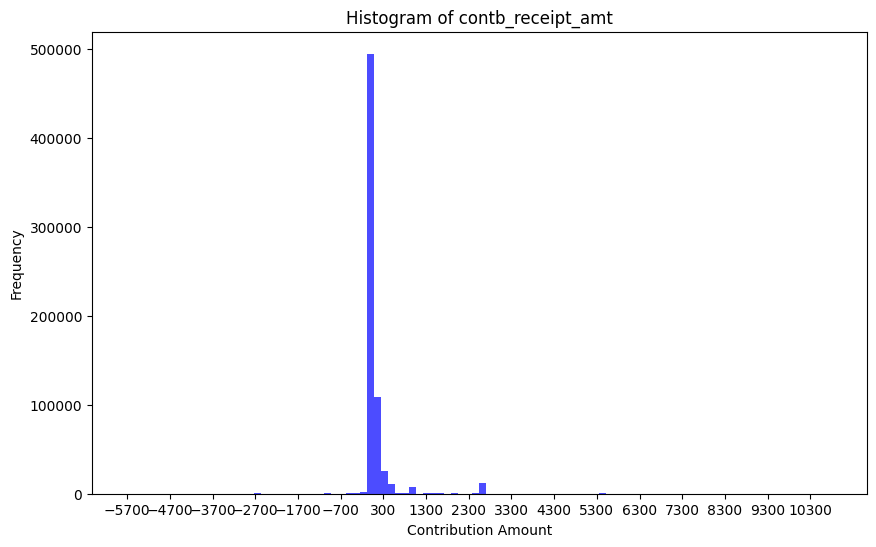

The contribution range with the highest count frequency is: (-90.0, 75.0)


In [6]:
# 1a YOUR CODE HERE
# Plotting histogram
plt.figure(figsize=(10, 6))
#plt.hist(contrib['contb_receipt_amt'], bins=50, color='blue', alpha=0.7)
counts, bins, _ = plt.hist(contrib['contb_receipt_amt'], bins=100, color='blue', alpha=0.7)

# Set labels and title
plt.title('Histogram of contb_receipt_amt')
plt.xlabel('Contribution Amount')
plt.ylabel('Frequency')

#Setting interval values on the x-axis 
plt.xticks(np.arange(min(bins), max(bins) + 1, 1000))  # Adjust the interval as needed
# Show the plot
plt.show()

## Finding the bin with the maximum count
max_count_index = np.argmax(counts)
max_count_range = (bins[max_count_index], bins[max_count_index + 1])
print(f"The contribution range with the highest count frequency is: {max_count_range}")

- **1a answer here:** 

Contributtions between -90 to 75 has the highest count frequency. 

**1b.** Plotting a histogram of contribute amount (10 points)

Make a 'zoomed-in' histogram of the range that had the highest count frequencies from 1a above. 

Remember to include on your histogram:
- Include a title
- Include axis labels
- The correct number of bins to see the breakout of values

What are some insights that you can see from these two histograms (1a and 1b)?

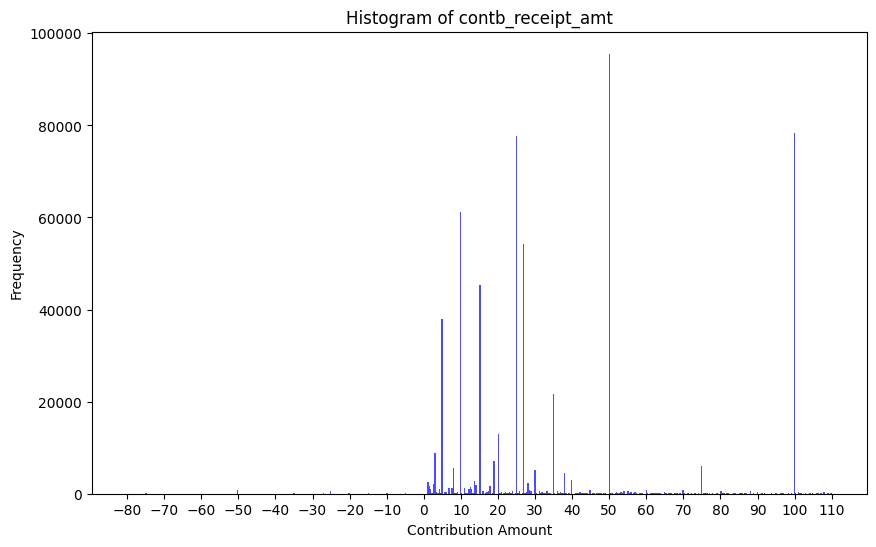

The contribution range with the highest count frequency is: (49.96000000000001, 50.34)


In [10]:
# 1b YOUR CODE HERE
# Plotting histogram to include the range from previous answer
plt.figure(figsize=(10, 6))
counts, bins, _ = plt.hist(contrib['contb_receipt_amt'], bins=500, range=(-80,110), color='blue', alpha=0.7)

# Finding the bin with the maximum count
max_count_index = np.argmax(counts)
max_count_range = (bins[max_count_index], bins[max_count_index + 1])

# Setting labels and title
plt.title('Histogram of contb_receipt_amt')
plt.xlabel('Contribution Amount')
plt.ylabel('Frequency')

# Setting more interval values on the x-axis
plt.xticks(np.arange(min(bins), max(bins) + 1, 10))  # Adjusting the interval as needed

# Show the plot
plt.show()

print(f"The contribution range with the highest count frequency is: {max_count_range}")


- **1b answer here:** 
From the histogram, it can be seen that there are several high frequency small contributions. For example, $50 is the highest count frequency contribution with ranges in $5, $10, $15, $25, and $100 seeing high frequency count as well.

**1c.** Present a time-series line chart with the following elements (10 points)  

- The chart needs to have two lines - one for Bernie Sanders and one for Hillary Clinton.
- Show the date on the x-axis
- Add vertical lines for these dates of the primary debates: 17 Jan 2016, 11 Feb 2016, 9 Mar 2016
- Show the total contribution amount for that day on the y-axis
- Include a title
- Include axis labels

How did the debates effect fundraising / donations? Did fundraising increase or decrease after the debates for each candidate?

['P00003392' 'P60007168' 'P60006111' 'P60006046' 'P60008059' 'P60006723'
 'P60003670' 'P60008521' 'P40003576' 'P60008885' 'P80001571' 'P20002671'
 'P60007242' 'P20002721' 'P60008398' 'P80003478' 'P60007671' 'P60007572'
 'P20003984' 'P60005915' 'P60009685' 'P60007697' 'P20003281' 'P80003379']
Unique Candidate ID for Bernard Sanders: ['P60007168']


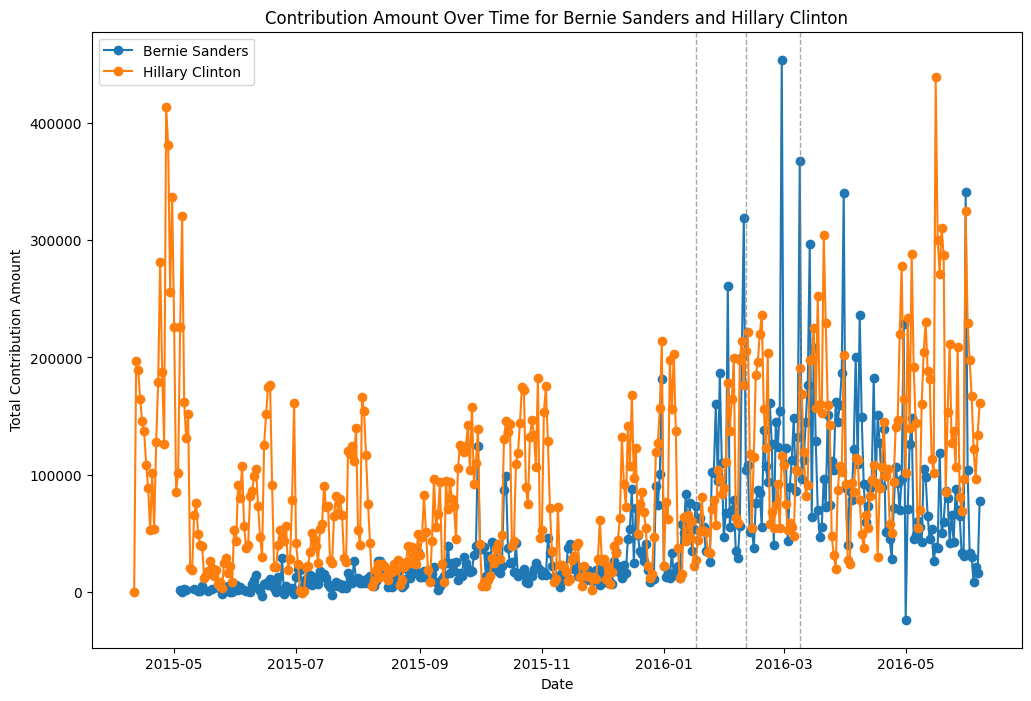

In [13]:
# 1c YOUR CODE HERE

unique_cand_id= contrib['cand_id'].unique()
print(unique_cand_id)

sanders_data = contrib[contrib['cand_nm'] == 'Sanders, Bernard']

#Checking unique values in the 'cand_id' column for Bernie Sanders
unique_cand_ids = sanders_data['cand_id'].unique()

print("Unique Candidate ID for Bernard Sanders:", unique_cand_ids)



# Filtering rows for 'Hillary Rodham Clinton'
clinton_data = contrib[contrib['cand_nm'] == 'Clinton, Hillary Rodham']



# Filtering data for Bernie Sanders and Hillary Clinton
sanders_data = contrib[contrib['cand_nm'] == 'Sanders, Bernard']
clinton_data = contrib[contrib['cand_nm'] == 'Clinton, Hillary Rodham']

# Group data by date and sum contribution amounts
sanders_daily_total = sanders_data.groupby('contb_receipt_dt')['contb_receipt_amt'].sum()
clinton_daily_total = clinton_data.groupby('contb_receipt_dt')['contb_receipt_amt'].sum()

# Plotting time-series line chart
plt.figure(figsize=(12, 8))

# Plotting lines for Bernie Sanders and Hillary Clinton
plt.plot(sanders_daily_total.index, sanders_daily_total.values, label='Bernie Sanders', marker='o')
plt.plot(clinton_daily_total.index, clinton_daily_total.values, label='Hillary Clinton', marker='o')

# Adding vertical lines for primary debate dates
debate_dates = pd.to_datetime(['2016-01-17', '2016-02-11', '2016-03-09'])
for date in debate_dates:
    plt.axvline(x=date, color='gray', linestyle='--', linewidth=1, alpha=0.7)

# Setting labels and title
plt.title('Contribution Amount Over Time for Bernie Sanders and Hillary Clinton')
plt.xlabel('Date')
plt.ylabel('Total Contribution Amount')
plt.legend()

# Show the plot
plt.show()


- **1c answer here:** 
fter the first debate in January, an increase in the fundraising for both candidates can be seen. Then,  fundraising increased just before and during the 2nd and third debate for both candidates. Sanders saw an influx of funding after the first debate while Hilary had high fundraising at the beginning of the time period. 

## 2. Exploring Campaign Contributions (35 points)

Let's investigate the donations to the candidates. (5 points)

**2a.** Present a table that shows the number of donations to each candidate sorted by number of donations.**

- When presenting data as a table, it is often best to sort the data in a meaningful way. This makes it easier for your reader to examine what you've done and to glean insights.  From now on, all tables that you present in this assignment (and course) should be sorted.
- Hint: Use the `groupby` method. Groupby is explained in Unit 13: async 13.3 & 13.5
- Hint: Use the `sort_values` method to sort the data so that candidates with the largest number of donations appear on top.

Which candidate received the largest number/count of contributions (variable 'contb_receipt_amt')?

In [16]:
# 2a YOUR CODE HERE
#Grouping data by candidate and counting the number of donations
donations_count_by_candidate = contrib.groupby('cand_nm')['contb_receipt_amt'].count().reset_index()

# Renaming columns
donations_count_by_candidate.columns = ['Candidate', 'Number of Donations']

#Sorting the table by the number of donations in descending order
donations_count_by_candidate_sorted = donations_count_by_candidate.sort_values(by='Number of Donations', ascending=False)

# Display the sorted table
print(donations_count_by_candidate_sorted)


                    Candidate  Number of Donations
18           Sanders, Bernard               379284
3     Clinton, Hillary Rodham               171104
4   Cruz, Rafael Edward 'Ted'                56355
1         Carson, Benjamin S.                27015
17               Rubio, Marco                13267
5              Fiorina, Carly                 4679
15                 Paul, Rand                 4164
21           Trump, Donald J.                 3806
0                   Bush, Jeb                 3056
11            Kasich, John R.                 2957
22              Walker, Scott                  666
8              Huckabee, Mike                  531
13    O'Malley, Martin Joseph                  392
12           Lessig, Lawrence                  353
2    Christie, Christopher J.                  333
7          Graham, Lindsey O.                  305
20                Stein, Jill                  180
23      Webb, James Henry Jr.                  106
16     Perry, James R. (Rick)  

- **2a answer here:** 

**2b.** Now, present a table that shows the total value of donations to each candidate sorted by total value of the donations. (5 points)

Which candidate raised the most money in California?

In [22]:
# 2b YOUR CODE HERE
#Grouping data by candidate and summing donations
total_donations_by_candidate = contrib.groupby('cand_nm')['contb_receipt_amt'].sum().reset_index()

# Renaming columns
total_donations_by_candidate.columns = ['Candidate', 'Total Donation Value']

#Sorting the table by donation value in descending order
total_donations_by_candidate_sorted = total_donations_by_candidate.sort_values(by='Total Donation Value', ascending=False)

# Display the sorted table
print(total_donations_by_candidate_sorted)

                    Candidate  Total Donation Value
3     Clinton, Hillary Rodham         38,969,122.68
18           Sanders, Bernard         19,062,998.80
4   Cruz, Rafael Edward 'Ted'          5,926,568.27
17               Rubio, Marco          4,998,700.92
0                   Bush, Jeb          3,316,836.83
1         Carson, Benjamin S.          3,022,105.15
5              Fiorina, Carly          1,473,989.42
11            Kasich, John R.          1,471,417.54
21           Trump, Donald J.            868,672.16
15                 Paul, Rand            721,563.14
22              Walker, Scott            492,706.90
2    Christie, Christopher J.            456,066.00
7          Graham, Lindsey O.            379,495.00
13    O'Malley, Martin Joseph            297,334.26
8              Huckabee, Mike            230,890.60
16     Perry, James R. (Rick)            208,400.00
12           Lessig, Lawrence            148,032.52
23      Webb, James Henry Jr.             76,568.16
19       San

- **2b answer here:** 
Hilary Clinton raised the most money in California.

**2c.** Combine the tables (sorted by either a or b above). (5 points)

- Looking at the two tables you presented above - if those tables are Series convert them to DataFrames.
- Rename the variable (column) names to accurately describe what is presented.
- Merge together your tables to show the *count* and the *value* of donations to each candidate in one table.
- Hint: Use the `merge` method.

In [106]:
# 2c YOUR CODE HERE

#I have renamed the columns in the previous codes
merged_df = pd.merge(total_donations_by_candidate_sorted, donations_count_by_candidate_sorted, on='Candidate')
print(merged_df)

                    Candidate  Total Donation Value  Number of Donations
0     Clinton, Hillary Rodham         38,969,122.68               171104
1            Sanders, Bernard         19,062,998.80               379284
2   Cruz, Rafael Edward 'Ted'          5,926,568.27                56355
3                Rubio, Marco          4,998,700.92                13267
4                   Bush, Jeb          3,316,836.83                 3056
5         Carson, Benjamin S.          3,022,105.15                27015
6              Fiorina, Carly          1,473,989.42                 4679
7             Kasich, John R.          1,471,417.54                 2957
8            Trump, Donald J.            868,672.16                 3806
9                  Paul, Rand            721,563.14                 4164
10              Walker, Scott            492,706.90                  666
11   Christie, Christopher J.            456,066.00                  333
12         Graham, Lindsey O.            379,495.00

**2d. Calculate and add a new variable to the table from 2c that shows the average \$ per donation. Print this table sorted by the average donation** (5 points)

Which candidate had the highest average donation?

In [149]:
# 2d YOUR CODE HERE
merged_df['Average $ per Donation'] = merged_df['Total Donation Value'] / merged_df['Number of Donations']

# Sort the table by average donation in descending order
merged_df_sorted = merged_df.sort_values(by='Average $ per Donation', ascending=False)

# Display the sorted table
print(merged_df_sorted)
merged_df_sorted.head()



                    Candidate  Total Donation Value  Number of Donations  \
23       Gilmore, James S III              8,100.00                    3   
15     Perry, James R. (Rick)            208,400.00                  104   
20          Pataki, George E.             30,450.00                   20   
11   Christie, Christopher J.            456,066.00                  333   
12         Graham, Lindsey O.            379,495.00                  305   
4                   Bush, Jeb          3,316,836.83                 3056   
13    O'Malley, Martin Joseph            297,334.26                  392   
22              Jindal, Bobby             23,231.26                   31   
10              Walker, Scott            492,706.90                  666   
17      Webb, James Henry Jr.             76,568.16                  106   
7             Kasich, John R.          1,471,417.54                 2957   
19              Johnson, Gary             31,787.80                   68   
14          

,Candidate,Total Donation Value,Number of Donations,Average $ per Donation
23,"Gilmore, James S III","8,100.00",3,"2,700.00"
15,"Perry, James R. (Rick)","208,400.00",104,"2,003.85"
20,"Pataki, George E.","30,450.00",20,"1,522.50"
11,"Christie, Christopher J.","456,066.00",333,"1,369.57"
12,"Graham, Lindsey O.","379,495.00",305,"1,244.25"


- **2d answer here:** 
James S III Gilmore had the highest average donation.

**2e. Plotting a Bar Chart** (10 points)

Make a single bar chart that shows two different bars per candidate with one bar as the total value of the donations and the other as average $ per donation. 
- Show the Candidates Name on the x-axis
- Show the amount on the y-axis
- Include a title
- Include axis labels
- Sort by total value of the donations
- Make the y-axis a log-scale to show both numbers! (matplotlib docs: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.yscale.html )

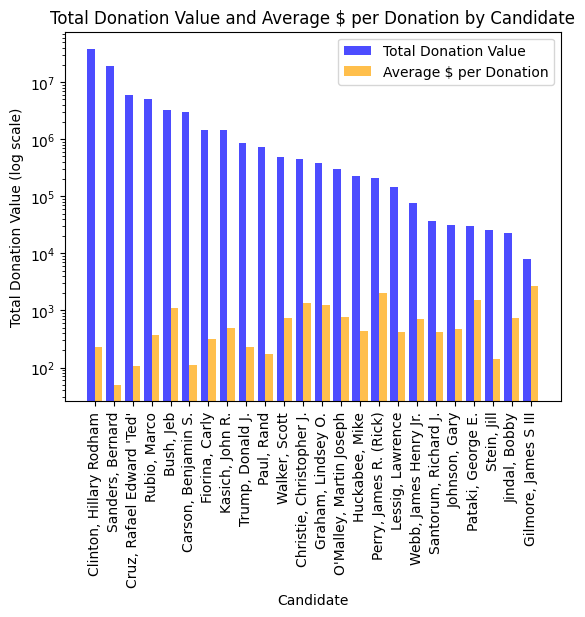

In [207]:
# 2e YOUR CODE HERE

# Sorting the merged DataFrame by total value of donations in descending order
merged_df_sorted = merged_df.sort_values(by='Total Donation Value', ascending=False)

# Creating a bar chart
bar_width = 0.4  # Width of each bar
index = np.arange(len(merged_df_sorted['Candidate']))

# Plotting bars for total donation value
plt.bar(index, merged_df_sorted['Total Donation Value'], width=bar_width, label='Total Donation Value', color='blue', alpha=0.7)

# Plotting bars for average $ per donation next to the total donation value bars
plt.bar(index + bar_width, merged_df_sorted['Average $ per Donation'], width=bar_width, label='Average $ per Donation', color='orange', alpha=0.7)

# Setting y-axis to log scale
plt.yscale('log')

#labels and title
plt.title('Total Donation Value and Average $ per Donation by Candidate')
plt.xlabel('Candidate')
plt.ylabel('Total Donation Value (log scale)')
plt.xticks(index + bar_width / 2, merged_df_sorted['Candidate'])
plt.xticks(rotation=90)
# Display the legend
plt.legend()

# Show the plot
plt.show()


**2f. Comment on the results of your data analysis in a short paragraph.** (5 points)

- There are several interesting conclusions you can draw from the table you have created.
- What have you learned about campaign contributions in California?
- We are looking for data insights here rather than comments on the code!

- **2f answer here:** 
Sanders has the lowest average donation while raising the second highest fund. Gilmore has the highest average donation while raising the least fund. It looks like Sanders received a lot of public donation while Hilary and many other candidates received super pac or other big corporation donations. 

## 3. Exploring Donor Occupations (35 points)

Above in part 2, we saw that some simple data analysis can give us insights into the campaigns of our candidates. Now let's quickly look to see what *kind* of person is donating to each campaign using the `contbr_occupation` variable.

**3a.** Show the top 5 occupations of individuals that contributed to Hillary Clinton. (5 points)

- Subset your data to create a dataframe with only donations for Hillary Clinton.
- Then use the `value_counts` and `head` methods to present the top 5 occupations (`contbr_occupation`) for her donors.
- Note: we are just interested in the count of donations, not the value of those donations.

In [240]:
# 3a YOUR CODE HERE
# Hillary Clinton

top_occupations_clinton = clinton_data['contbr_occupation'].value_counts().head(5).reset_index() #converting series to Data Frame

top_occupations_clinton.columns = ['Occupation', 'Number of Contributions']

# Display the top 5 occupations for Hillary Clinton
print(top_occupations_clinton)



              Occupation  Number of Contributions
0                RETIRED                    35767
1               ATTORNEY                     7514
2  INFORMATION REQUESTED                     4991
3                TEACHER                     3848
4              HOMEMAKER                     3522


**3b.** Write a function called `get_donors`. (5 points)
 
Imagine that you want to do the previous operation on several candidates.  To keep your work neat, you want to take the work you did on the Clinton-subset and wrap it in a function that you can apply to other subsets of the data.

- The function should take a DataFrame as a parameter, and return a Series containing the counts for the top 5 occupations contained in that DataFrame.

In [300]:
def get_donors(df):
    """This function takes a dataframe that contains a variable named contbr_occupation.
    It outputs a Series containing the counts for the 5 most common values of that
    variable."""
    
    # 3b YOUR CODE HERE
    print("Candidate Name: ", df['cand_nm'].unique())
    top_occupations = df['contbr_occupation'].value_counts().head(5).reset_index() #converting series to Data Frame

    top_occupations.columns = ['Occupation', 'Number of Contributions']

    # Display the top 5 occupations for Hillary Clinton
    print(top_occupations)
    

**3c.** Now run the `get_donors` function from 3b on subsets of the dataframe corresponding to three candidates. Show each of the three candidates below. (5 points)

- Hillary Clinton
- Bernie Sanders
- Donald Trump

In [303]:
# 3c YOUR CODE HERE

#finding/checking unique candidate names
print(contrib['cand_nm'].unique())

sanders_data = contrib[contrib['cand_nm'] == 'Sanders, Bernard']
clinton_data = contrib[contrib['cand_nm'] == 'Clinton, Hillary Rodham']
trump_data = contrib[contrib['cand_nm'] == 'Trump, Donald J.']

get_donors(sanders_data)

get_donors(clinton_data)

get_donors(trump_data)

['Clinton, Hillary Rodham' 'Sanders, Bernard' "Cruz, Rafael Edward 'Ted'"
 'Walker, Scott' 'Bush, Jeb' 'Rubio, Marco' 'Kasich, John R.'
 'Christie, Christopher J.' 'Paul, Rand' 'Webb, James Henry Jr.'
 'Trump, Donald J.' 'Johnson, Gary' 'Fiorina, Carly'
 'Santorum, Richard J.' 'Jindal, Bobby' 'Huckabee, Mike'
 "O'Malley, Martin Joseph" 'Pataki, George E.' 'Stein, Jill'
 'Carson, Benjamin S.' 'Lessig, Lawrence' 'Graham, Lindsey O.'
 'Perry, James R. (Rick)' 'Gilmore, James S III']
Candidate Name:  ['Sanders, Bernard']
          Occupation  Number of Contributions
0       NOT EMPLOYED                    98217
1            RETIRED                    15352
2            TEACHER                    10390
3  SOFTWARE ENGINEER                     7957
4           ENGINEER                     7237
Candidate Name:  ['Clinton, Hillary Rodham']
              Occupation  Number of Contributions
0                RETIRED                    35767
1               ATTORNEY                     7514
2  INF

**3d.** Finally, use `groupby` to separate the entire dataset by candidate. (10 points)

- Call .apply(get_donors) on your groupby object, which will apply the function you wrote to each subset of your data.
- Look at your output and marvel at what pandas can do in just one line!

In [305]:
# 3d YOUR CODE HERE
# Group by candidate and apply get_donors function to each group
contrib.groupby('cand_nm').apply(get_donors)


Candidate Name:  ['Bush, Jeb']
  Occupation  Number of Contributions
0    RETIRED                      992
1  HOMEMAKER                      177
2   ATTORNEY                       90
3       Q.A.                       89
4  PRESIDENT                       83
Candidate Name:  ['Carson, Benjamin S.']
                               Occupation  Number of Contributions
0                                 RETIRED                    13635
1  INFORMATION REQUESTED PER BEST EFFORTS                     1610
2                               HOMEMAKER                     1028
3                               PHYSICIAN                      321
4                                    R.N.                      232
Candidate Name:  ['Christie, Christopher J.']
   Occupation  Number of Contributions
0     RETIRED                       38
1        NONE                       22
2  CONSULTANT                       18
3         CEO                       16
4   HOMEMAKER                       15
Candidate Name:  [

""


**3e.** Comment on your data insights & findings in a short paragraph. (5 points)

- **3e answer here:** 
Donors who are not employed were the top most contributors in Bernie Sanders' fund followed by retirees, teachers, software engineers and engineers. This shows the diverse group of people that were donating to Bernie's campaign. Retired people followed by attorneys were the top two donors in Hilary Clinton's campaign. On the other hand, Trump had 62 CEOs, people in sale and business owners as well as retired people in his top 5 donor occupation. This shows how the corporate world/business owners were in favor of him. 

**3f.** Think about your findings in section 3 vs. your findings in section 2 of this assignment. (5 points)

Do you have any new data insights into the results you saw in section 2 now that you see the top occupations for each candidate?

- **3f answer here:** 
It can be seen from data in section 3 that retired people made into the top 5 donor list of almost all candidates. Homemaker and teacher were two common occupations as well in many candidate's top donor list. The data in section 2 showed the candidates with highest donations and average donation from which we learned that while Hilary Clinton had the highest donations, Bernie Sanders that the highest number of donors and the least avergae donations. This is mainly because of grassroot people donating smaller amounts in Sanders' campaign. 

## If you have feedback for this homework, please submit it using the link below:

http://goo.gl/forms/74yCiQTf6k